# Identidade de Euler

**Objetivos**
1. Preparo B√°sico para a Transformada de Fourier

**Resultado Esperado**
1. Entender a identidade de Euler

*Devido ao assunto da aula esse lab ficou mais te√≥rico*

In [1]:
from music21 import *

import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 2

plt.ion()

A identidade Euler √© considerada a equa√ß√£o matem√°tica mais bela j√° feita. A mesma est√° representada abaixo:

$$ e^{i\pi} + 1 = 0 $$

Observe como a mesma cont√©m:
1. A constante e, uma das constantes mais importantes da matem√°tica. N√£o s√≥ isso, aqui representa exponencia√ß√£o.
1. A constante pi, outra constante importante representando a geometria/trigonometria. 
1. A constante i, representando n√∫meros complexos.
1. A constante 1.
1. A constante 0.
1. Uma soma
1. Uma multiplica√ß√£o.
1. O resultado √© zero, nada.

Em outras palavras, a identidade de Euler tem exatamente 1 opera√ß√£o b√°sica de cada, sendo operadas em constantes importantes, chegando ao resultado zero (algo comum na matem√°tica, igualar a zero). N√£o tem log, nem divis√£o, nem subtra√ß√£o, mas tudo isso √© apenas o oposto das opera√ß√µes.

Sabendo da beleza da mesma, podemos derivar ela atrav√©s de:

$$ e^{ix} = \cos(x) + i \sin(x) $$

Agora vamos brincar um pouco com c√≥digo para visualizar a identidade de Euler.

<img src='euler.png' alt="drawing" style="width:300px;"/>

Vamos gerar uma curva de seno + cosseno no intervalo `[0, 2pi]`. Para tal, vou usar um linspace como entrada para sua fun√ß√£o. Observe que, claramente, o eixo-x da curva cobre um comprimento de $2\pi$. Voc√™ andou essa quantidade subindo e descendo na sen√≥ide (eixo y). Na figura da direita, voc√™ andou 2pi dando uma volta no c√≠rculo.

(a escala x confunde um pouco, os plots tem o mesmo tamanho, fiz para o c√≠rculo ficar perfeito).

Como falamos em aula, um forma de pensar no caminhamento nas coordenadas polares √© que cada passo de tamanha $e^{ix}$ caminha um seno e um cosseno. Por√©m, tal caminhamento muda de dire√ß√£o em cada passo!

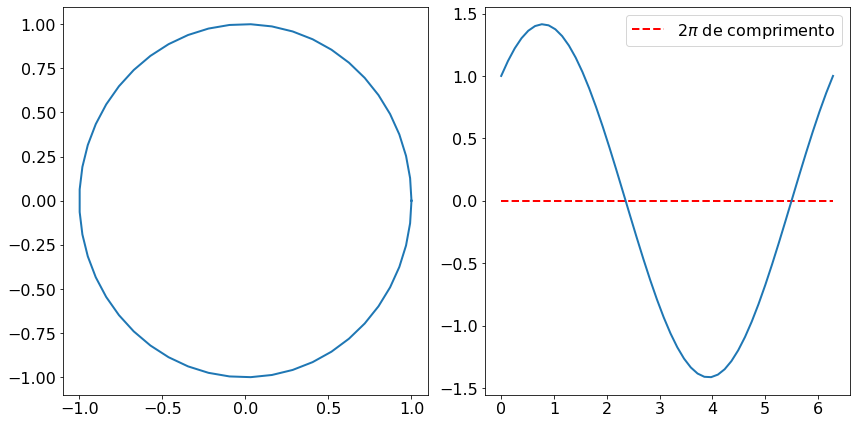

In [2]:
def sin_mais_cos(x):
    return np.sin(x) + np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

x = np.linspace(0, 2 * np.pi)
ax[0].plot(np.cos(x), np.sin(x))
ax[1].plot(x, sin_mais_cos(x))
ax[1].hlines(0, 0, 2 * np.pi, color='red', ls='--', lw=2, label='$2\pi$ de comprimento')
ax[1].legend()
fig.tight_layout()

Uma outra de ver isto √© no c√≥digo abaixo. A intensidade de cor √© o valor se seno+cos. O plot mostranto tanto o caminhamento em seno quanto em coseno. Observe como a volta √© representado na cor nos extremos da parte Real e Imagin√°ria (seno e cosseno)

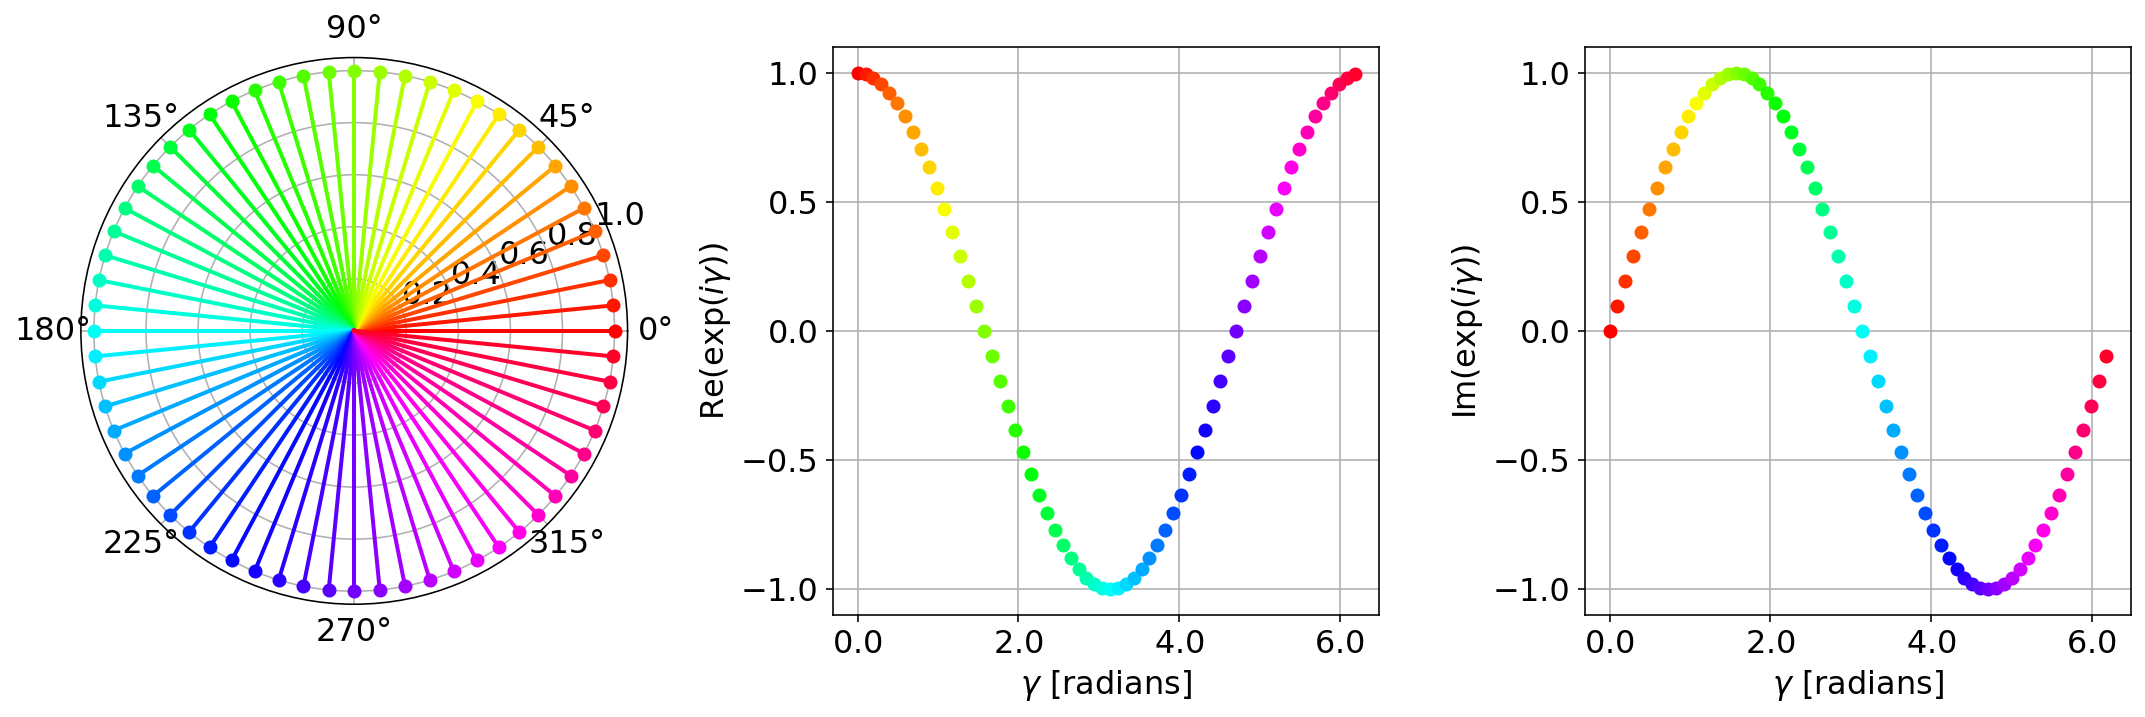

In [3]:
cmap = plt.cm.get_cmap('hsv') # hsv is nice because it is a circular color map

N = 64

fig = plt.figure(figsize=(5 * 3, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(N):
    gamma = 2 * np.pi * i / N
    c = np.exp(1j * gamma)
    color = cmap(i / N)
    ax1.plot([0, np.angle(c)], [0, np.abs(c)], color=color)
    ax1.plot(np.angle(c), np.abs(c), 'o', color=color)
    ax2.plot(gamma, np.real(c), 'o', color=color)
    ax3.plot(gamma, np.imag(c), 'o', color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radians]')
ax2.set_ylabel('$\mathrm{Re}(\exp(i \gamma))$')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radians]')
ax3.set_ylabel('$\mathrm{Im}(\exp(i \gamma))$')
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

## Perguntas

**Quest√£o 1** Onde o seno e cosseno operam em radianos. √â f√°cil plugar $\pi$ acima e chegar na identidade. O mais complicado √© provar a mesma. Usando as expans√µes de taylor de $e$, $\sin$ e $\cos$ (vide Wikipedia), escreva a prova de $e^{ix} = \cos(x) + i \sin(x)$. Voc√™ pode usar os slides, mas formalize a prova abaixo para se convencer da mesma.

- **Resposta**: Observando as expans√µes em s√©ries de Taylor de cada fun√ß√£o, teremos o seguinte:
- $$ e^x = \sum_{n=0}^\infty \frac{x^n}{n!} = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots + \frac{x^n}{n!} + \ldots \text{, } \forall x \in \mathbb{R} $$

- $$ e^{ix} = \sum_{n=0}^\infty \frac{(ix)^n}{n!} = 1 + i\frac{x}{1!} - \frac{x^2}{2!} -i \frac{x^3}{3!} + \ldots + \frac{(ix)^n}{n!} + \ldots \text{, } \forall x \in \mathbb{R} \text{ onde } i = \sqrt{-1} $$

- $$ sin(x) = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} = x -\frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + \frac{(-1)^n}{(2n+1)!}x^{2n+1} + \ldots \text{, } \forall x \in \mathbb{R} $$

- $$ cos(x) = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}x^{2n} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} -\frac{x^6}{6!} + \ldots +  \frac{(-1)^n}{(2n)!}x^{2n} + \ldots \text{, } \forall x \in \mathbb{R} $$

- Com as f√≥rmulas acima, conseguimos perceber que as f√≥rmulas se "encaixam" (seria melhor se expandissemos para valores maiores de $n$, por√©m, resolvi expandir at√© $n=3$ para observarmos o comportamento inicial do padr√£o).
- Observando a s√©rie da fun√ß√£o $e^{ix}$ podemos perceber que as parcelas $1$, $-\frac{x^2}{2!}$, $\frac{x^4}{4!}$, $-\frac{x^6}{6!}$, $\ldots$ (ou seja, as parcelas "pares") vem da fun√ß√£o cosseno; enquanto que as parcelas $x$ (ou $\frac{x}{1!}$), $-\frac{x^3}{3!}$, $\frac{x^5}{5!}$, $-\frac{x^7}{7!}$, $\ldots$ (ou seja, as parcelas "√≠mpares") vem da fun√ß√£o seno, que, ao multiplicarmos por $i$, origina a f√≥rmula de Euler $e^{ix} = cos(x) + isin(x)$.

**Quest√£o 2**  Em python, `1j` quer dizer 1 imagin√°rio `1i`. Escreva um c√≥digo que aproxima a identidade de euler. 

In [4]:
print(2j + 2j*1j)

(-2+2j)


In [5]:
def euler():
    return np.e ** (1j * np.pi) + 1

In [6]:
# Testando a fun√ß√£o. 
euler()

1.2246467991473532e-16j

**Quest√£o 3** Crie fun√ß√µes que aproximam o *seno*, *cosseno* e *expoencial* via expans√£o de taylor.

In [7]:
# x √© o valor para entrar no seno, isto √© seno(x). n √© a quantidade de termos na expans√£o.
def approx_sin(x: float, n: int):
    return np.sum([((-1)**i / np.math.factorial(2*i + 1)) * x**(2*i+1) for i in range(n)])

# x √© o valor para entrar no seno, isto √© seno(x). n √© a quantidade de termos na expans√£o.
def approx_cos(x: float, n: int):
    return np.sum([((-1)**i / np.math.factorial(2*i)) * x**(2*i) for i in range(n)])

# x √© o valor para entrar no seno, isto √© seno(x). n √© a quantidade de termos na expans√£o.
def approx_e(x: float, n: int):
    return np.sum([x**i / np.math.factorial(i) for i in range(n)])

In [8]:
# Testando as fun√ß√µes criadas
print(approx_e(x=1j, n=100))
print(approx_cos(x=1, n=100) + 1j * approx_sin(x=1, n=100))

(0.5403023058681398+0.8414709848078966j)
(0.5403023058681397+0.8414709848078966j)


**Quest√£o 4**  Prove as propriedades abaixo.
1. $e^{ix} = e^{i(x + 2\pi)}$
1. |ùëí^{ùëñùë•}| = 1. Sabendo que $|c|$, onde $c = a + bi$ √© $\sqrt{a^2 + b^2}$.

- Para a primeira propriedade basta lembrarmos que as fun√ß√µes trigonom√©tricas cosseno e seno s√£o $L$-peri√≥dicas com per√≠odo $L=2\pi$, ou seja, $cos(x) = cos(x+2\pi)$ e $sin(x) = sin(x + 2\pi)$. Sendo assim, teremos que $e^{i(x+2\pi)} = cos(x+2\pi) + isin(x+2\pi) = cos(x) + isin(x) = e^{ix}$.

- Para a segunda propriedade teremos que $|e^{ix}| = |cos(x) + isin(x)|$. Utilizando a propriedade de que $|a + bi| = \sqrt{a^2 + b^2}$, teremos que $|e^{ix}| = \sqrt{cos^2(x) + sin^2(x)} = 1$ dado a igualdade $cos^2(x) + sin^2(x) = 1$.